# Import necessary libraries

In [108]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np
import requests

# Connect to the datasource

In [109]:
#Load in all match events 
events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/3906390.json')
events = events.json()
events

[{'id': '73d302be-c474-47b0-b465-d276046f96a5',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 863, 'name': "Spain Women's"},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 863, 'name': "Spain Women's"},
  'duration': 0.0,
  'tactics': {'formation': 4231,
   'lineup': [{'player': {'id': 45295, 'name': 'Catalina Thomas Coll Lluch'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 23},
    {'player': {'id': 46639, 'name': 'Ona Batlle Pascual'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 2},
    {'player': {'id': 10165, 'name': 'Irene Paredes Hernandez'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 4},
    {'player': {'id': 32694, 'name': 'Laia Codina Panedas'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 14},
   

# Transform data to a DataFrame

In [110]:
#Transform JSON into a dataframe 
df = json_normalize(events)

# Displaying all columns for wide DataFrames
pd.set_option("display.max.columns", None)

df.head()

id  index  period     timestamp  minute  \
0  73d302be-c474-47b0-b465-d276046f96a5      1       1  00:00:00.000       0   
1  cbad5dd0-01cd-4be0-8693-15942b19d363      2       1  00:00:00.000       0   
2  62cea4b4-febc-4df9-8df0-a134ed91e70f      3       1  00:00:00.000       0   
3  ebcc30be-9a0a-4f38-b241-8c8dd9834589      4       1  00:00:00.000       0   
4  30728cd8-f0a6-4535-8f24-16a37a1d4f08      5       1  00:00:00.563       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                 863   
1       0           1  0.000000       35  Starting XI                 863   
2       0           1  0.000000       18   Half Start                 863   
3       0           1  0.000000       18   Half Start                 863   
4       0           2  0.781021       30         Pass                 865   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0        Spain Women's                1      Regular Play      863   
1        Spain Women's                1      Regular Play      865   
2        Spain Women's                1      Regular Play      865   
3        Spain Women's                1      Regular Play      863   
4      England Women's                9     From Kick Off      865   

         team.name  tactics.formation  \
0    Spain Women's             4231.0   
1  England Women's             3412.0   
2  England Women's                NaN   
3    Spain Women's                NaN   
4  England Women's                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 45295, 'name': 'Catalina Th...   
1  [{'player': {'id': 31538, 'name': 'Mary Alexan...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [ebcc30be-9a0a-4f38-b241-8c8dd9834589]           NaN        NaN   
3  [62cea4b4-febc-4df9-8df0-a134ed91e70f]           NaN        NaN   
4  [b796b4f0-d521-4d6a-903e-b63c45120ec9]  [61.0, 40.1]    31534.0   

  player.name  position.id              position.name  pass.recipient.id  \
0         NaN          NaN                        NaN                NaN   
1         NaN          NaN                        NaN                NaN   
2         NaN          NaN                        NaN                NaN   
3         NaN          NaN                        NaN                NaN   
4  Ella Toone         19.0  Center Attacking Midfield             4658.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4         Keira Walsh    10.080674   -2.951979             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [51.1, 38.2]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location  pass.outcome.id  \
0           NaN            NaN                NaN              NaN   
1           NaN            NaN                NaN              NaN   
2           NaN            NaN                NaN              NaN   
3           NaN            NaN                NaN         

# Filter out necessary data

In [111]:
#Filtering passes made by France

spain_passes = df.loc[(df['type.name'] == 'Pass') & (df['possession_team.name'] == "Spain Women's")]

#Let's look what we got

spain_passes.tail()

id  index  period     timestamp  \
3520  219bc9c4-b7f5-4001-8963-44366fa0325a   3521       2  00:55:43.297   
3526  326d2b94-45cd-4016-bf6b-8e612b58e723   3527       2  00:56:24.318   
3540  c4152ad1-3e24-432f-9ea9-be9fdbf9f430   3541       2  00:56:53.577   
3544  ad2a011d-1371-484f-8093-b9f82bbec3d3   3545       2  00:56:55.067   
3551  c7bdf4d0-2eda-4c4c-83f2-043aae2ff684   3552       2  00:57:38.920   

      minute  second  possession  duration  type.id type.name  \
3520     100      43         192  0.689799       30      Pass   
3526     101      24         193  3.771395       30      Pass   
3540     101      53         196  1.180523       30      Pass   
3544     101      55         196  1.000813       30      Pass   
3551     102      38         197  2.901847       30      Pass   

      possession_team.id possession_team.name  play_pattern.id  \
3520                 863        Spain Women's                1   
3526                 863        Spain Women's                3   
3540                 863        Spain Women's                1   
3544                 863        Spain Women's                1   
3551                 863        Spain Women's                3   

     play_pattern.name  team.id      team.name  tactics.formation  \
3520      Regular Play      863  Spain Women's                NaN   
3526    From Free Kick      863  Spain Women's                NaN   
3540      Regular Play      863  Spain Women's                NaN   
3544      Regular Play      863  Spain Women's                NaN   
3551    From Free Kick      863  Spain Women's                NaN   

     tactics.lineup                                     related_events  \
3520            NaN  [90046c9b-3135-48c2-9683-28c48261d18c, ae92fd1...   
3526            NaN             [2f70d116-0050-48b0-95d2-a8f02110b79d]   
3540            NaN  [a66e3b74-4cb0-42e0-9eb3-6d986c7e7635, c572443...   
3544            NaN  [1e099bb3-422d-4b84-abb4-a81f7116a8cc, 3228aa0...   
3551            NaN             [bf1fc963-4387-4cd7-9197-1ba6ebdbadeb]   

          location  player.id               player.name  position.id  \
3520  [58.4, 75.7]    49889.0  Oihane Hernández Zurbano         17.0   
3526  [57.4, 73.3]    46639.0        Ona Batlle Pascual          2.0   
3540  [29.5, 21.7]    10165.0   Irene Paredes Hernandez          5.0   
3544  [31.9, 15.5]    49836.0      Olga  Carmona García          6.0   
3551  [37.6, 13.2]    10165.0   Irene Paredes Hernandez          5.0   

         position.name  pass.recipient.id        pass.recipient.name  \
3520        Right Wing            10151.0   Jennifer Hermoso Fuentes   
3526        Right Back           222682.0  Salma Paralluelo Ayingono   
3540  Left Center Back            49836.0       Olga  Carmona García   
3544         Left Back            10143.0     Alexia Putellas Segura   
3551  Left Center Back            10151.0   Jennifer Hermoso Fuentes   

      pass.length  pass.angle  pass.height.id pass.height.name  \
3520     6.103278   -1.603571             1.0      Ground Pass   
3526    58.487090   -0.896856             3.0        High Pass   
3540     7.034202   -1.312025             1.0      Ground Pass   
3544     6.000000    0.927295             1.0      Ground Pass   
3551    59.722694   -0.104001             3.0        High Pass   

     pass.end_location  pass.body_part.id pass.body_part.name  pass.type.id  \
3520      [58.2, 69.6]               40.0          Right Foot           NaN   
3526      [93.9, 27.6]               40.0          Right Foot          62.0   
3540      [31.3, 14.9]               38.0           Left Foot          66.0   
3544      [35.5, 20.3]               38.0           Left Foot           NaN   
3551       [97.0, 7.0]               40.0          Right Foot          62.0   

     pass.type.name carry.end_location  pass.outcome.id pass.outcome.name  \
3520            NaN                NaN              NaN               NaN   
3526      Free Kick                NaN           

# Draw a Pitch

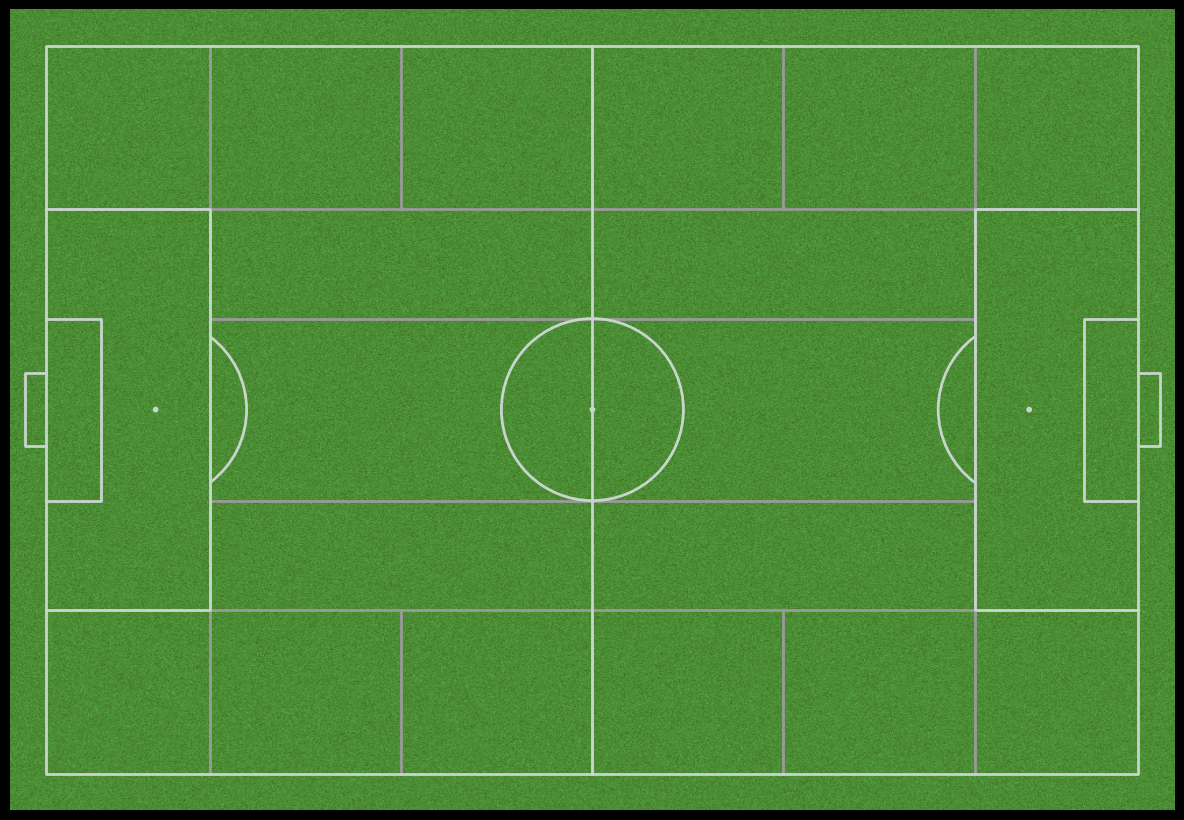

In [112]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)


# Create a Pass Map

Text(0.5, 1.0, 'Spain Passes')

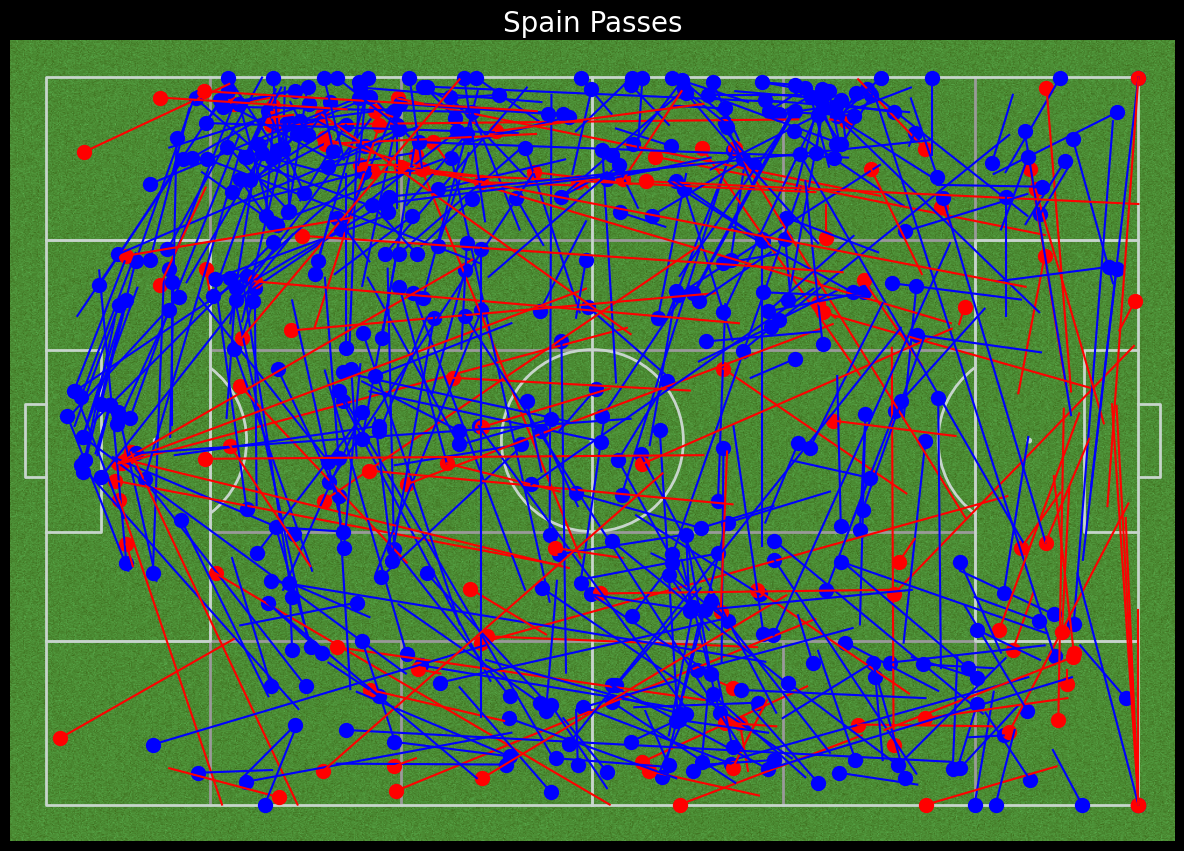

In [113]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_passes['id'])):
    #We can choose period 1, 2 or both
    if spain_passes['period'].iloc[x] == 1 or spain_passes['period'].iloc[x] == 2:
        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out', 
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='red')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='red', s=100)
        else:
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='blue')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='blue', s=100)
    
plt.title('Spain Passes',color='white',size=20)

# Apply filters to the Pass Map

Text(0.5, 1.0, 'Olga Carmona García Passes')

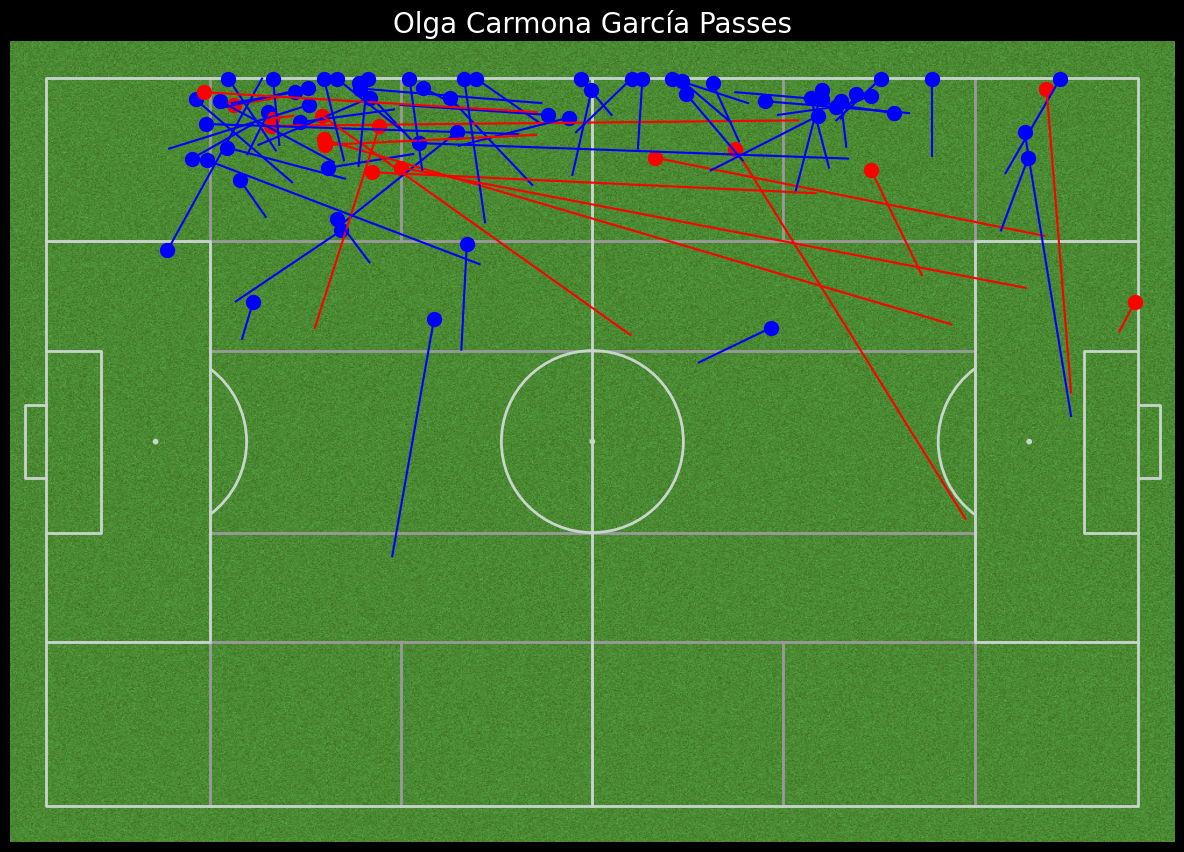

In [114]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_passes['id'])):
    #We can choose period 1, 2 or both
    if (spain_passes['period'].iloc[x] == 2 or spain_passes['period'].iloc[x] == 1) and\
        (spain_passes['player.id'].iloc[x] == 49836.0):
        if any([spain_passes['pass.outcome.name'].iloc[x] == 'Incomplete', spain_passes['pass.outcome.name'].iloc[x] == 'Out', 
                spain_passes['pass.outcome.name'].iloc[x] == 'Unknown', spain_passes['pass.outcome.name'].iloc[x] == 'Pass Offside',
                spain_passes['pass.outcome.name'].iloc[x] == 'Injury Clearance']):
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='red')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='red', s=100)
        else:
            
            plt.plot((spain_passes['location'].iloc[x][0],spain_passes['pass.end_location'].iloc[x][0]),\
                     (spain_passes['location'].iloc[x][1],spain_passes['pass.end_location'].iloc[x][1]),color='blue')
            
            plt.scatter(spain_passes['location'].iloc[x][0],spain_passes['location'].iloc[x][1],color='blue', s=100)
    
plt.title('Olga Carmona García Passes',color='white',size=20)

In [115]:
(spain_passes['player.id'] == 49836).value_counts()

False    459
True      75
Name: player.id, dtype: int64

In [116]:
(spain_passes['player.id'] == 49836).value_counts(True)

False    0.859551
True     0.140449
Name: player.id, dtype: float64

# Create a Shots Map

In [117]:
#Filtering passes made by France

spain_shots = df.loc[(df['type.name'] == 'Shot') & (df['possession_team.name'] == "Spain Women's")]

#Let's look what we got

spain_shots.tail()

id  index  period     timestamp  \
3135  13bfb975-c566-4d4b-8ab9-13f86b171c99   3136       2  00:44:01.420   
3143  eb4229cc-4b57-4f94-9ddb-cc86be1894d4   3144       2  00:44:58.612   
3244  42a6f141-e4a6-4425-b81a-d79729b5cf6b   3245       2  00:46:22.078   
3449  e02d58a5-45f1-4c3e-b5ae-fad12fa4f8ab   3450       2  00:52:48.993   
3457  2096f125-07f0-410b-b187-c285c46db7fe   3458       2  00:52:53.872   

      minute  second  possession  duration  type.id type.name  \
3135      89       1         171  0.237771       16      Shot   
3143      89      58         172  0.163503       16      Shot   
3244      91      22         174  0.045529       16      Shot   
3449      97      48         187  0.168420       16      Shot   
3457      97      53         187  0.119024       16      Shot   

      possession_team.id possession_team.name  play_pattern.id  \
3135                 863        Spain Women's                1   
3143                 863        Spain Women's                2   
3244                 863        Spain Women's                1   
3449                 863        Spain Women's                6   
3457                 863        Spain Women's                6   

     play_pattern.name  team.id      team.name  tactics.formation  \
3135      Regular Play      863  Spain Women's                NaN   
3143       From Corner      863  Spain Women's                NaN   
3244      Regular Play      863  Spain Women's                NaN   
3449      From Counter      863  Spain Women's                NaN   
3457      From Counter      863  Spain Women's                NaN   

     tactics.lineup                                     related_events  \
3135            NaN  [00bfd45e-0e27-4413-89a7-be6dbd3e0948, 33e5def...   
3143            NaN  [43b9f2cc-37b2-4131-b884-b2b2e6405165, e53cda8...   
3244            NaN  [5de70f23-186c-4dd3-8a85-2bf800703c60, 84b6ae1...   
3449            NaN  [3a59b3ee-6345-45c8-871c-309de40465e3, ae47f3e...   
3457            NaN  [76bbc48e-814d-4ca1-b31b-6d8f172a4a30, b7cf6ed...   

           location  player.id                player.name  position.id  \
3135  [109.3, 30.3]    10151.0   Jennifer Hermoso Fuentes         19.0   
3143  [114.8, 45.1]    10143.0     Alexia Putellas Segura         15.0   
3244  [108.8, 54.2]    46639.0         Ona Batlle Pascual          2.0   
3449   [99.0, 44.7]    15284.0       Aitana Bonmati Conca         13.0   
3457  [105.8, 25.4]   222682.0  Salma Paralluelo Ayingono         21.0   

                  position.name  pass.recipient.id pass.recipient.name  \
3135  Center Attacking Midfield                NaN                 NaN   
3143       Left Center Midfield                NaN                 NaN   
3244                 Right Back                NaN                 NaN   
3449      Right Center Midfield                NaN                 NaN   
3457                  Left Wing                NaN                 NaN   

      pass.length  pass.angle  pass.height.id pass.height.name  \
3135          NaN         NaN             NaN              NaN   
3143          NaN         NaN             NaN              NaN   
3244          NaN         NaN             NaN              NaN   
3449          NaN         NaN             NaN              NaN   
3457          NaN         NaN             NaN              NaN   

     pass.end_location  pass.body_part.id pass.body_part.name  pass.type.id  \
3135               NaN                NaN                 NaN           NaN   
3143               NaN                NaN                 NaN           NaN   
3244               NaN                NaN                 NaN           NaN   
3449               NaN                NaN                 NaN           NaN   
3457               NaN                NaN                 NaN           NaN   

     pass.type.name carry.end_location  pass.outcome.id pass.outcome.name  \
3135            NaN                NaN              NaN               NaN   
3143            NaN      

Text(0.5, 1.0, 'Spain Shots')

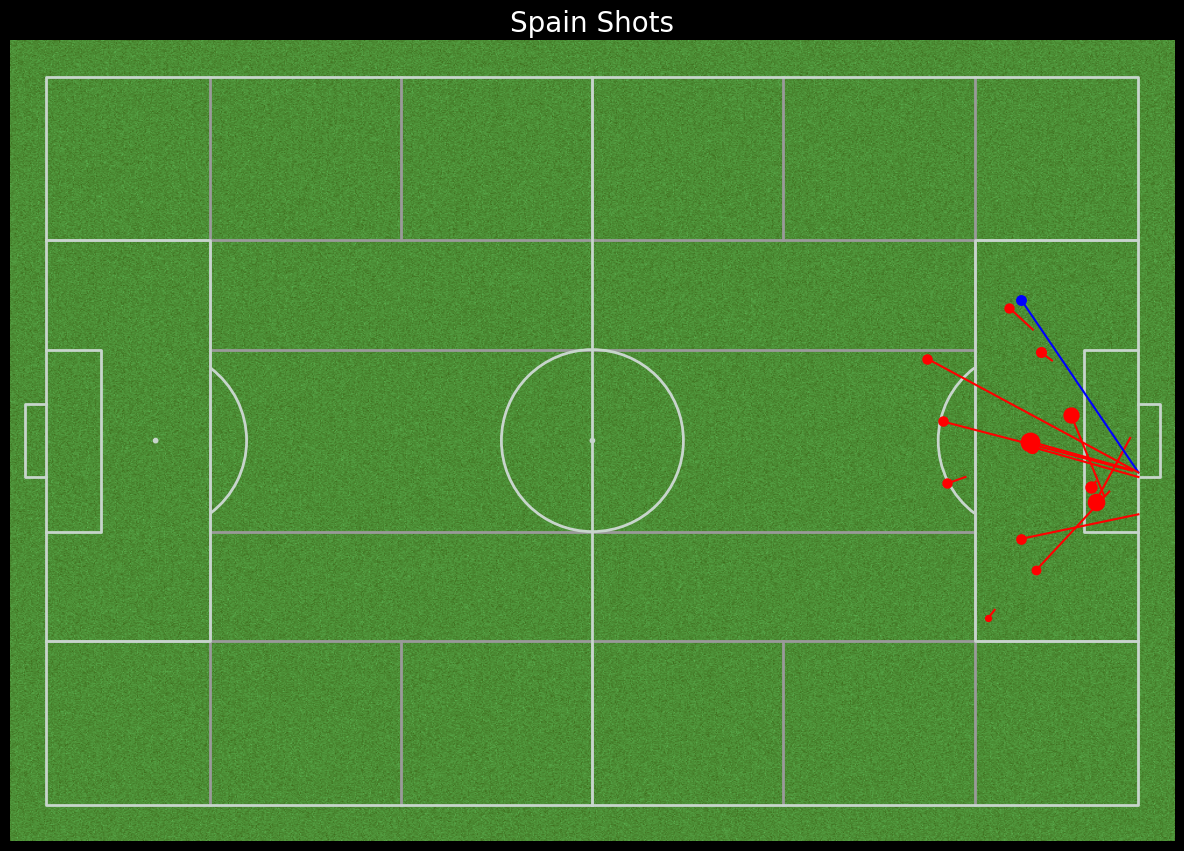

In [118]:
fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='statsbomb', positional=True, positional_color='#9A9A9A',
              pitch_color='grass', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(spain_shots['id'])):
    #We can choose period 1, 2 or both
    if spain_shots['period'].iloc[x] == 1 or spain_shots['period'].iloc[x] == 2:
        # Size of scatter will depend on xG
        size = np.sqrt(spain_shots['shot.statsbomb_xg'].iloc[x])*200
        if spain_shots['shot.outcome.name'].iloc[x] == 'Goal':
            '''
            We can use the .plot() function to draw lines if we give it two pairs of coordinates:
            *First must contain the start and end X locations
            *Second gives the start and end Y locations
            For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
            '''
            plt.plot((spain_shots['location'].iloc[x][0],spain_shots['shot.end_location'].iloc[x][0]),\
                     (spain_shots['location'].iloc[x][1],spain_shots['shot.end_location'].iloc[x][1]),color='blue')
            plt.scatter(spain_shots['location'].iloc[x][0],spain_shots['location'].iloc[x][1],s=size,color='blue')
        else:
            plt.plot((spain_shots['location'].iloc[x][0],spain_shots['shot.end_location'].iloc[x][0]),\
                     (spain_shots['location'].iloc[x][1],spain_shots['shot.end_location'].iloc[x][1]),color='red')
            plt.scatter(spain_shots['location'].iloc[x][0],spain_shots['location'].iloc[x][1],s=size,color='red')
    
plt.title('Spain Shots',color='white',size=20)

# Create Possession Chart

In [119]:
poss_test = copy.copy(df)
poss_test.head()

id  index  period     timestamp  minute  \
0  73d302be-c474-47b0-b465-d276046f96a5      1       1  00:00:00.000       0   
1  cbad5dd0-01cd-4be0-8693-15942b19d363      2       1  00:00:00.000       0   
2  62cea4b4-febc-4df9-8df0-a134ed91e70f      3       1  00:00:00.000       0   
3  ebcc30be-9a0a-4f38-b241-8c8dd9834589      4       1  00:00:00.000       0   
4  30728cd8-f0a6-4535-8f24-16a37a1d4f08      5       1  00:00:00.563       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                 863   
1       0           1  0.000000       35  Starting XI                 863   
2       0           1  0.000000       18   Half Start                 863   
3       0           1  0.000000       18   Half Start                 863   
4       0           2  0.781021       30         Pass                 865   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0        Spain Women's                1      Regular Play      863   
1        Spain Women's                1      Regular Play      865   
2        Spain Women's                1      Regular Play      865   
3        Spain Women's                1      Regular Play      863   
4      England Women's                9     From Kick Off      865   

         team.name  tactics.formation  \
0    Spain Women's             4231.0   
1  England Women's             3412.0   
2  England Women's                NaN   
3    Spain Women's                NaN   
4  England Women's                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 45295, 'name': 'Catalina Th...   
1  [{'player': {'id': 31538, 'name': 'Mary Alexan...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [ebcc30be-9a0a-4f38-b241-8c8dd9834589]           NaN        NaN   
3  [62cea4b4-febc-4df9-8df0-a134ed91e70f]           NaN        NaN   
4  [b796b4f0-d521-4d6a-903e-b63c45120ec9]  [61.0, 40.1]    31534.0   

  player.name  position.id              position.name  pass.recipient.id  \
0         NaN          NaN                        NaN                NaN   
1         NaN          NaN                        NaN                NaN   
2         NaN          NaN                        NaN                NaN   
3         NaN          NaN                        NaN                NaN   
4  Ella Toone         19.0  Center Attacking Midfield             4658.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4         Keira Walsh    10.080674   -2.951979             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [51.1, 38.2]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location  pass.outcome.id  \
0           NaN            NaN                NaN              NaN   
1           NaN            NaN                NaN              NaN   
2           NaN            NaN                NaN              NaN   
3           NaN            NaN                NaN         

In [120]:
for x in range(len(poss_test['index'])):
    if (poss_test['possession_team.id'].iloc[x] == 865):
        poss_test.duration.iloc[x] = poss_test.duration.iloc[x]*(-1)

In [121]:
poss_test.head()

id  index  period     timestamp  minute  \
0  73d302be-c474-47b0-b465-d276046f96a5      1       1  00:00:00.000       0   
1  cbad5dd0-01cd-4be0-8693-15942b19d363      2       1  00:00:00.000       0   
2  62cea4b4-febc-4df9-8df0-a134ed91e70f      3       1  00:00:00.000       0   
3  ebcc30be-9a0a-4f38-b241-8c8dd9834589      4       1  00:00:00.000       0   
4  30728cd8-f0a6-4535-8f24-16a37a1d4f08      5       1  00:00:00.563       0   

   second  possession  duration  type.id    type.name  possession_team.id  \
0       0           1  0.000000       35  Starting XI                 863   
1       0           1  0.000000       35  Starting XI                 863   
2       0           1  0.000000       18   Half Start                 863   
3       0           1  0.000000       18   Half Start                 863   
4       0           2 -0.781021       30         Pass                 865   

  possession_team.name  play_pattern.id play_pattern.name  team.id  \
0        Spain Women's                1      Regular Play      863   
1        Spain Women's                1      Regular Play      865   
2        Spain Women's                1      Regular Play      865   
3        Spain Women's                1      Regular Play      863   
4      England Women's                9     From Kick Off      865   

         team.name  tactics.formation  \
0    Spain Women's             4231.0   
1  England Women's             3412.0   
2  England Women's                NaN   
3    Spain Women's                NaN   
4  England Women's                NaN   

                                      tactics.lineup  \
0  [{'player': {'id': 45295, 'name': 'Catalina Th...   
1  [{'player': {'id': 31538, 'name': 'Mary Alexan...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                           related_events      location  player.id  \
0                                     NaN           NaN        NaN   
1                                     NaN           NaN        NaN   
2  [ebcc30be-9a0a-4f38-b241-8c8dd9834589]           NaN        NaN   
3  [62cea4b4-febc-4df9-8df0-a134ed91e70f]           NaN        NaN   
4  [b796b4f0-d521-4d6a-903e-b63c45120ec9]  [61.0, 40.1]    31534.0   

  player.name  position.id              position.name  pass.recipient.id  \
0         NaN          NaN                        NaN                NaN   
1         NaN          NaN                        NaN                NaN   
2         NaN          NaN                        NaN                NaN   
3         NaN          NaN                        NaN                NaN   
4  Ella Toone         19.0  Center Attacking Midfield             4658.0   

  pass.recipient.name  pass.length  pass.angle  pass.height.id  \
0                 NaN          NaN         NaN             NaN   
1                 NaN          NaN         NaN             NaN   
2                 NaN          NaN         NaN             NaN   
3                 NaN          NaN         NaN             NaN   
4         Keira Walsh    10.080674   -2.951979             1.0   

  pass.height.name pass.end_location  pass.body_part.id pass.body_part.name  \
0              NaN               NaN                NaN                 NaN   
1              NaN               NaN                NaN                 NaN   
2              NaN               NaN                NaN                 NaN   
3              NaN               NaN                NaN                 NaN   
4      Ground Pass      [51.1, 38.2]               40.0          Right Foot   

   pass.type.id pass.type.name carry.end_location  pass.outcome.id  \
0           NaN            NaN                NaN              NaN   
1           NaN            NaN                NaN              NaN   
2           NaN            NaN                NaN              NaN   
3           NaN            NaN                NaN         

([<matplotlib.axis.XTick at 0x2d6a7655720>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90'),
  Text(100, 0, '100')])

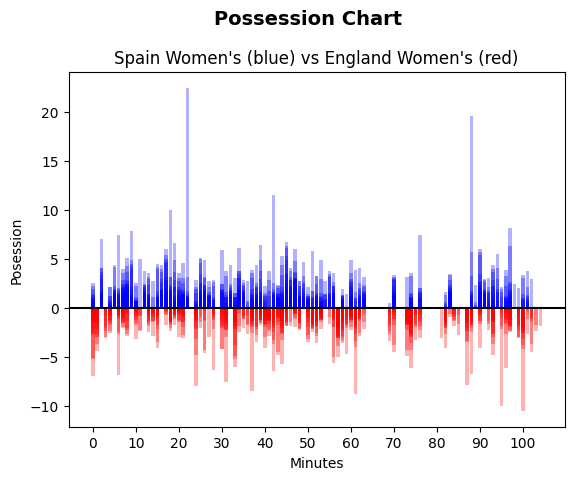

In [122]:
fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)

# Set titles for the figure and the subplot respectively
fig.suptitle('Possession Chart', fontsize=14, fontweight='bold')
ax.set_title(df['team.name'][0] + ' (blue)' + ' vs ' + df['team.name'][1] + ' (red)')

ax.set_xlabel('Minutes')
ax.set_ylabel('Posession')

plt.bar(poss_test.minute, poss_test.duration, color=np.where(poss_test.duration>0, 'b', 'r'), alpha=0.3)
#plt.ylim(-10, 5)
plt.axhline(0, color='black')
tot_min = poss_test.minute.max()
plt.xticks(np.arange(0, tot_min, step=10))
#fig.savefig('posession.png')